# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re


plt.style.use('seaborn')

In [4]:
def plot_epidemic_curves(run_folder: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    
    plt.figure(figsize=(7, 4))
    
    for filename in os.listdir(run_folder_path):
        filename_path = os.path.join(run_folder_path, filename)
        match = re.match(r'(?:[A-Z]+\_)+\d+\_(\d+\.\d+)', filename)
        
        if match is None:
            continue
        
        rho = float(match.groups(0)[0])
        
        results_df = pd.read_csv(filename_path)
        
        Xy = list(zip(results_df['InfectionRate'].values, results_df['TotalInfected'].values))
        Xy.sort()
        
        plt.scatter([x for x, y in Xy], [y for x, y in Xy], label=f'rho={rho:.3f}')
        plt.plot([x for x, y in Xy], [y for x, y in Xy], alpha=0.25)
        
    plt.legend()
    plt.show()

# Results

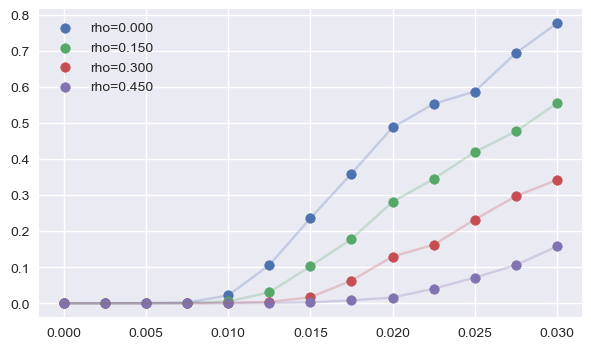

In [5]:
plot_epidemic_curves('critical_evaluation_1b')